# INSURANCE PREMIUM PREDICTIOR

In this project we will be building several model which best fits the provided dataset in order to predict insurance premium based on people medical expenses.

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Reading Insurance dataset provided with the project in .csv format, and showing partly how the data looks like
dataset = pd.read_csv('../Dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Findings
#### 1. There is no missing values in any column
#### 2. There are 3 categorical variable
#### 3. Total Number of columns is 1338

<AxesSubplot:>

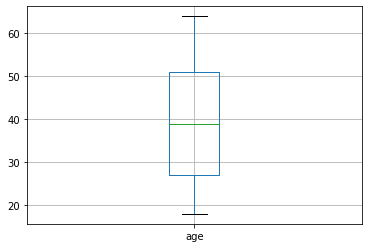

In [10]:
dataset.boxplot("age")
# Finding by seeing boxplot
# 1. Atleast 50% people that are purchasing insurance are between age 27 and 51.
# 2. Median Age is 39.
# 3. The youngest person that have insurance is 18, which could be the minimum age required for insurance.
# 4. Maximum age the people are willing to purchase insurance is 64

<AxesSubplot:>

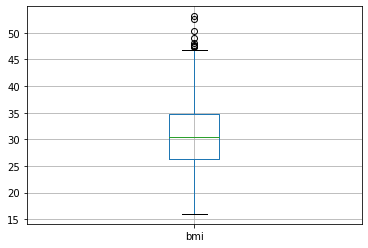

In [11]:
dataset.boxplot("bmi")
#BMI Score and Meaning: <18 : Underweight, 18 to 25 : Normal, 25> : Overweight and obease
# Finding by seeing boxplot
# 1. Atleast 50% people have bmi between 26 and 35 which is overweight and obese category, 
# 2. Atleast 75% people is in the category of overweight or obease and this may imply that overall policyholder could be unhealthy
# 3. Around 25% people have bmi between 26 and and 14, which indicates that people have normal or underweight bmi.
# 4. This box plot have outlier, find the link to understand more about outliers
#    -> https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#    -> https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309

<AxesSubplot:>

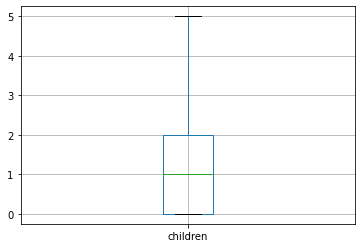

In [12]:
dataset.boxplot("children")
# Finding by seeing boxplot
# 1. Atleast 75% people have 2 child or less.
# 2. Around 25% people have more than 2 children.
# 3. Atleast 50% people have 1 child or less.

<AxesSubplot:>

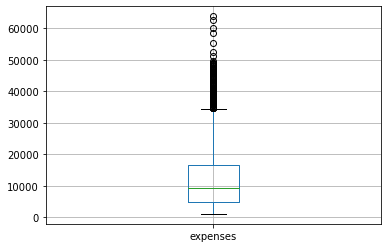

In [13]:
dataset.boxplot("expenses")
#Findings 

<AxesSubplot:title={'center':'expenses'}, xlabel='smoker'>

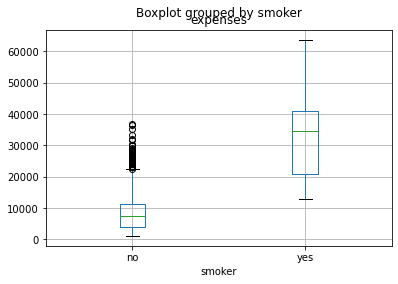

In [14]:
dataset.boxplot("expenses",by="smoker", )
#Findings 

In [15]:
#lets see what could data tell us more
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [16]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [17]:
dataset.cov()

,age,bmi,children,expenses
age,197.401387,9.368560,0.719303,5.087480e+04
bmi,9.368560,37.190265,0.092958,1.466515e+04
children,0.719303,0.092958,1.453213,9.926742e+02
expenses,50874.802133,14665.149703,992.674243,1.466524e+08


In [18]:
dataset.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [19]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

### Lets find out duplicate values if any

In [21]:
dataset.duplicated().value_counts()

False    1337
True        1
dtype: int64

### There is one duplicate values, we will drop this value

In [28]:
dataset.drop_duplicates(inplace=True)

In [30]:
dataset.duplicated().value_counts()
#Now no duplicate values are there.

False    1337
dtype: int64

<AxesSubplot:>

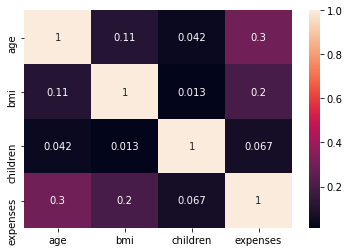

In [44]:
sb.heatmap(dataset.corr(), annot=True)

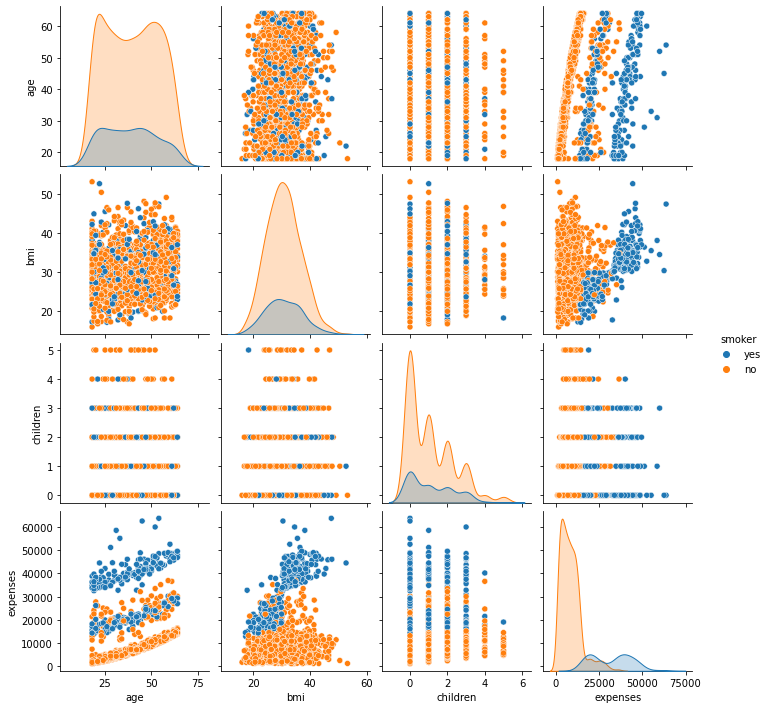

In [31]:
sb.pairplot(dataset, hue="smoker")

## Now lets encode dummy variable. We will perform different encoding techniques and see difference in result if any.

In [ ]:
#We know there are 3 categorical variable, which is sex, smoker, region.
#Firstly we will be applying one hot encoding technique to create dummy variables. Also to avoid dummy variable trap, 
# will drop one of the column, probably first one

In [50]:
# 1. By One hot encoding
dataset_oh = pd.get_dummies(dataset, drop_first=True)

In [51]:
dataset_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [52]:
# Separating dependent variable and independent varaiable, here y is our dependent variable(output) and X is independent variable
y = dataset_oh['expenses']
dataset_oh.drop(columns=['expenses'], inplace=True)
X = dataset_oh

## Making our first regression model to predict medical expense

In [80]:
# Dividing our dataset to training and test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [81]:
X_train.count()

age                 891
bmi                 891
children            891
sex_male            891
smoker_yes          891
region_northwest    891
region_southeast    891
region_southwest    891
dtype: int64

In [82]:
dataset.shape[0]*2/3

891.3333333333334

In [83]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

In [84]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [85]:
y_predict = linearModel.predict(X_test)

In [92]:
y_test.count()

446

ValueError: x and y must be the same size

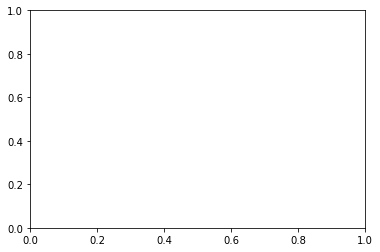

In [93]:
# plt.scatter(X_test, y_test)
plt.scatter(X_test, y_predict)
plt.show()